In [1]:
#Dependencies
import pandas as pd
import json
import random
import openweathermapy.core as owm
from citipy import citipy
import requests
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

#config file
from config import apikey

In [2]:
#Generate 500 random lon and lat numbers
#Range of longitude and latitude
lon = np.arange(-180,180,.5)
lat = np.arange(-90,90,.25)

#Generate the random lon and lat vallues using sample
rand_lat1 = random.sample(set(lat),500)
rand_lon1 = random.sample(set(lon),500)
rand_lat2 = random.sample(set(lat),500)
rand_lon2 = random.sample(set(lon),500)
rand_lat3 = random.sample(set(lat),500)
rand_lon3 = random.sample(set(lon),500)
rand_lat4 = random.sample(set(lat),500)
rand_lon4 = random.sample(set(lon),500)
rand_lat5 = random.sample(set(lat),500)
rand_lon5 = random.sample(set(lon),500)
rand_lat6 = random.sample(set(lat),500)
rand_lon6 = random.sample(set(lon),500)
rand_lat7 = random.sample(set(lat),500)
rand_lon7 = random.sample(set(lon),500)
rand_lat8 = random.sample(set(lat),500)
rand_lon8 = random.sample(set(lon),500)
rand_lat9 = random.sample(set(lat),500)
rand_lon9 = random.sample(set(lon),500)

In [3]:
#create dataframes to hold the random values
sample1 = pd.DataFrame({'lat_val':rand_lat1,'lon_val':rand_lon1})
sample2 = pd.DataFrame({'lat_val':rand_lat1,'lon_val':rand_lon1})
sample3 = pd.DataFrame({'lat_val':rand_lat3,'lon_val':rand_lon3})
sample4 = pd.DataFrame({'lat_val':rand_lat4,'lon_val':rand_lon4})
sample5 = pd.DataFrame({'lat_val':rand_lat5,'lon_val':rand_lon5})
sample6 = pd.DataFrame({'lat_val':rand_lat6,'lon_val':rand_lon6})
sample7 = pd.DataFrame({'lat_val':rand_lat7,'lon_val':rand_lon7})
sample8 = pd.DataFrame({'lat_val':rand_lat8,'lon_val':rand_lon8})
sample9 = pd.DataFrame({'lat_val':rand_lat9,'lon_val':rand_lon9})

samples_list = [sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9]

sample_df = pd.concat(samples_list)

sample_df['coordinates'] = list(zip(sample_df.lat_val, sample_df.lon_val))
sample_df.head()

,lat_val,lon_val,coordinates
0,-31.25,-78.5,"(-31.25, -78.5)"
1,73.50,171.0,"(73.5, 171.0)"
2,87.75,-155.5,"(87.75, -155.5)"
3,-33.75,-61.0,"(-33.75, -61.0)"
4,-19.50,13.5,"(-19.5, 13.5)"


In [4]:
#Use citipy to generate cities for the coordinates
cities = []
name = []
country_code = []

for coordinates in sample_df['coordinates']:
    lat, lon = coordinates
    cities.append(citipy.nearest_city(lat, lon))
    
for city in cities:
    country_code.append(city.country_code)
    name.append(city.city_name)
    #print(f"The country code of {name} is '{country_code}'.")
    
sample_df['country_code'] = country_code
sample_df['city'] = name

sample_df.head()

,lat_val,lon_val,coordinates,country_code,city
0,-31.25,-78.5,"(-31.25, -78.5)",cl,valparaiso
1,73.50,171.0,"(73.5, 171.0)",ru,pevek
2,87.75,-155.5,"(87.75, -155.5)",us,barrow
3,-33.75,-61.0,"(-33.75, -61.0)",ar,pergamino
4,-19.50,13.5,"(-19.5, 13.5)",na,opuwo


In [5]:
sample_df = sample_df.drop_duplicates(['city'], keep=False)
sample_df.head()

,lat_val,lon_val,coordinates,country_code,city
1,31.50,33.5,"(31.5, 33.5)",il,ashqelon
2,-23.25,-49.5,"(-23.25, -49.5)",br,piraju
4,58.00,-140.5,"(58.0, -140.5)",ca,haines junction
9,-21.75,-76.5,"(-21.75, -76.5)",cl,tocopilla
13,62.00,116.0,"(62.0, 116.0)",ru,suntar


In [6]:
len(sample_df)

753

In [7]:
#Api calls through open weather map
url = 'http://api.openweathermap.org/data/2.5/weather'
settings = {"appid":apikey, "units":"imperial"}

In [8]:
# create a dataframe to hold series of Api calls
weather_df = pd.DataFrame()
weather_df['id'] = ''
weather_df['city'] = ''
weather_df['country'] = ''
weather_df['lat'] = ''
weather_df['lon'] = ''
weather_df['date'] = ''
weather_df['temperature'] = ''
weather_df['humidity'] = ''
weather_df['cloudiness'] = ''
weather_df['wind speed'] = ''

In [9]:
#start on empty series to hold weather_json in each city
weather_json = []
city_count = 0

for index, row in sample_df.iterrows():
    city_name = row['city']
    settings['q'] = city_name
    city_count = city_count + 1
    
    response = requests.get(url, params=settings)
    response_json = response.json()
    print(response.url)
    print(f"{city_count} - {city_name} has been added to weather_df")

    try:
        weather_df.at[index,'id'] = response_json['id']
        weather_df.at[index,'city'] = response_json['name']
        weather_df.at[index,'country'] = response_json['sys']['country']
        weather_df.at[index,'lat'] = response_json['coord']['lat']
        weather_df.at[index,'lon'] = response_json['coord']['lat']
        weather_df.at[index,'date'] = response_json['dt']
        weather_df.at[index,'temperature'] = response_json['main']['temp']
        weather_df.at[index,'humidity'] = response_json['main']['humidity']
        weather_df.at[index,'cloudiness'] = response_json['clouds']['all']
        weather_df.at[index,'wind speed'] = response_json['wind']['speed']
        
    except(KeyError, IndexError):
        continue

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=ashqelon
1 - ashqelon has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=piraju
2 - piraju has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=haines+junction
3 - haines junction has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=tocopilla
4 - tocopilla has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=suntar
5 - suntar has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=madaoua
6 - madaoua has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=yei
55 - yei has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=lodwar
56 - lodwar has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=tawang
57 - tawang has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=yarmouth
58 - yarmouth has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=picton
59 - picton has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mergui
60 - mergui has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=standish
109 - standish has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mookane
110 - mookane has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=shieli
111 - shieli has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=dutse
112 - dutse has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=nipawin
113 - nipawin has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mangai
114 - mangai has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1f

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=balyaga
162 - balyaga has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=pringsewu
163 - pringsewu has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=strezhevoy
164 - strezhevoy has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mardin
165 - mardin has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=venafro
166 - venafro has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=aksarka
167 - aksarka has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc92

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=ayagoz
215 - ayagoz has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=zhumadian
216 - zhumadian has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=krasnyy+bogatyr
217 - krasnyy bogatyr has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=alakurtti
218 - alakurtti has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=beisfjord
219 - beisfjord has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mana
220 - mana has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c7

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=golden
269 - golden has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=cockburn+harbour
270 - cockburn harbour has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=casper
271 - casper has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=contamana
272 - contamana has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=formoso+do+araguaia
273 - formoso do araguaia has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=la+union
274 - la union has been added to weather_df
http://api.openweathermap.org/da

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=raduzhnyy
322 - raduzhnyy has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=moron
323 - moron has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=yanchukan
324 - yanchukan has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=monywa
325 - monywa has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=dryden
326 - dryden has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=gat
327 - gat has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe7

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kissamos
375 - kissamos has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=poncitlan
376 - poncitlan has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kapiri+mposhi
377 - kapiri mposhi has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=trairi
378 - trairi has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=soyo
379 - soyo has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=zarubino
380 - zarubino has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7a

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kulunda
428 - kulunda has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=luchegorsk
429 - luchegorsk has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=maine-soroa
430 - maine-soroa has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=san+fernando
431 - san fernando has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kaabong
432 - kaabong has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=amla
433 - amla has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76a

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=galesong
483 - galesong has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=outlook
484 - outlook has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=parati
485 - parati has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=tsumeb
486 - tsumeb has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=ust-tarka
487 - ust-tarka has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=bucak
488 - bucak has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b3

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=pincher+creek
536 - pincher creek has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=karauli
537 - karauli has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=moyale
538 - moyale has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=tommot
539 - tommot has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kholtoson
540 - kholtoson has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=danville
541 - danville has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=pemangkat
590 - pemangkat has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mangit
591 - mangit has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=progreso
592 - progreso has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=uyuni
593 - uyuni has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=krasnoarmeysk
594 - krasnoarmeysk has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=ixtapa
595 - ixtapa has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=lysyye+gory
644 - lysyye gory has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=altamont
645 - altamont has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=callaway
646 - callaway has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=boyuibe
647 - boyuibe has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kassala
648 - kassala has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=novyy+yegorlyk
649 - novyy yegorlyk has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=vilyuysk
697 - vilyuysk has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=mehamn
698 - mehamn has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=monteagudo
699 - monteagudo has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=a
700 - a has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=kambove
701 - kambove has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=marion
702 - marion has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe7

http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=vredendal
751 - vredendal has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=bokoro
752 - bokoro has been added to weather_df
http://api.openweathermap.org/data/2.5/weather?appid=9c76ab6bc7afc9223eedb19b38b1fe74&units=imperial&q=igarka
753 - igarka has been added to weather_df


In [16]:
pprint(json.dumps(response_json))

('{"coord": {"lon": 86.57, "lat": 67.47}, "weather": [{"id": 800, "main": '
 '"Clear", "description": "clear sky", "icon": "01n"}], "base": "stations", '
 '"main": {"temp": -1.13, "pressure": 1019.87, "humidity": 80, "temp_min": '
 '-1.13, "temp_max": -1.13, "sea_level": 1027.62, "grnd_level": 1019.87}, '
 '"wind": {"speed": 14.79, "deg": 333.005}, "clouds": {"all": 0}, "dt": '
 '1522959988, "sys": {"message": 0.0046, "country": "RU", "sunrise": '
 '1522883140, "sunset": 1522934947}, "id": 1505991, "name": "Igarka", "cod": '
 '200}')


In [17]:
weather_df.to_csv("Weatherpy.csv")
weather_df.head()

,id,city,country,lat,lon,date,temperature,humidity,cloudiness,wind speed
1,3631878,Moron,VE,10.49,10.49,1522958400,89.6,52,40,10.29
2,532664,Lysyye Gory,RU,51.55,51.55,1522959955,19.93,79,0,2.82
4,1254727,Terdal,IN,16.49,16.49,1522959925,72.13,72,36,4.61
9,507427,Pokrovskoye,RU,47.41,47.41,1522959935,42.43,71,56,2.71
13,2025261,Chulman,RU,56.84,56.84,1522959799,7.78,69,48,8.08


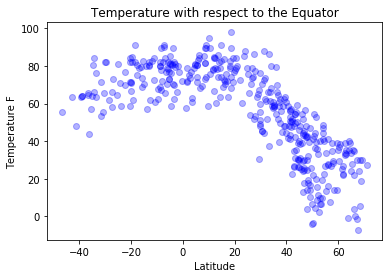

In [18]:
#Create scatter plot of Temperature vs. Latitude
x_val = weather_df['lat']
y_val = weather_df['temperature']
plt.scatter(x_val,y_val, alpha = .3, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.title("Temperature with respect to the Equator")
plt.savefig("tempvslat.png")
plt.show()

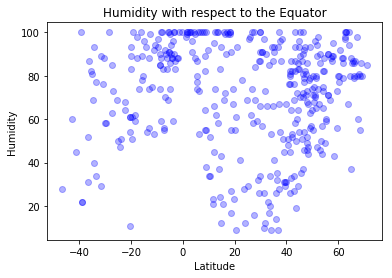

In [19]:
#Create a scatter plot of Humidity vs Latitude
x_val = weather_df['lat']
y_val = weather_df['humidity']
plt.scatter(x_val,y_val, alpha = .3, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity with respect to the Equator")
plt.savefig("humvslat.png")
plt.show()

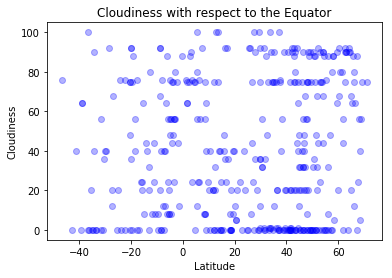

In [20]:
#Create scatter plot of Cloudiness vs Latitude
x_val = weather_df['lat']
y_val = weather_df['cloudiness']
plt.scatter(x_val,y_val, alpha = .3, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness with respect to the Equator")
plt.savefig("cloudvslat")
plt.show()

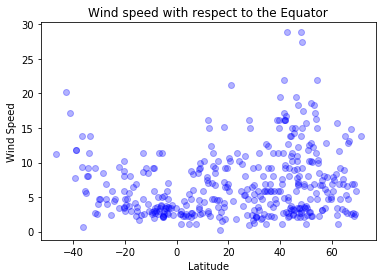

In [21]:
#Create a scatter plot of Wind speed vs Latitude
x_val = weather_df['lat']
y_val = weather_df['wind speed']
plt.scatter(x_val,y_val, alpha = .3, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind speed with respect to the Equator")
plt.savefig("windvslat")
plt.show()